In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Bar Charts

In [2]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


Use the `group` method to count how many times a categorical variable appears in a column

In [3]:
top.group('Studio').sort("count", descending=True)

Studio,count
Warner Bros.,29
Buena Vista (Disney),29
Fox,26
Paramount,25
Universal,22
Disney,11
Columbia,10
MGM,7
UA,6
Sony,6


How many of the top movies did each studio produce?

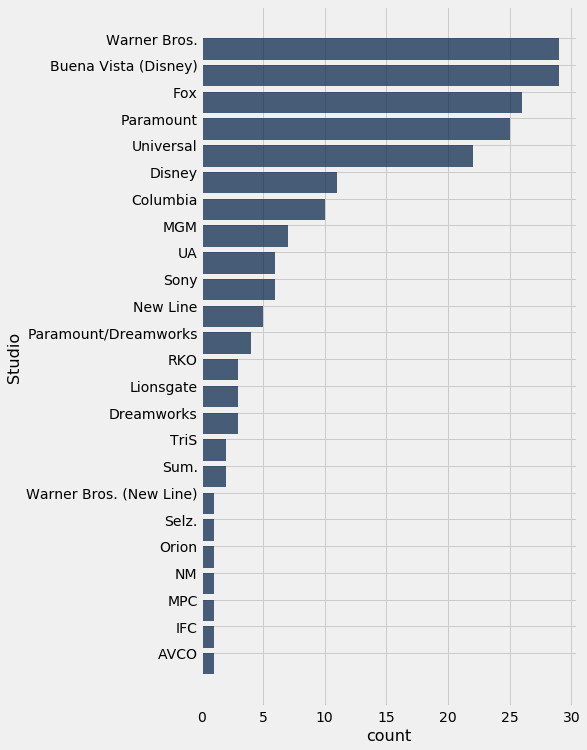

In [4]:
top.group('Studio').sort("count", descending=True).barh('Studio', 'count')

How old are each of these movies?

In [5]:
aged = top.with_column("Age", 2018-top.column('Year'))

How many movies of each age are there?

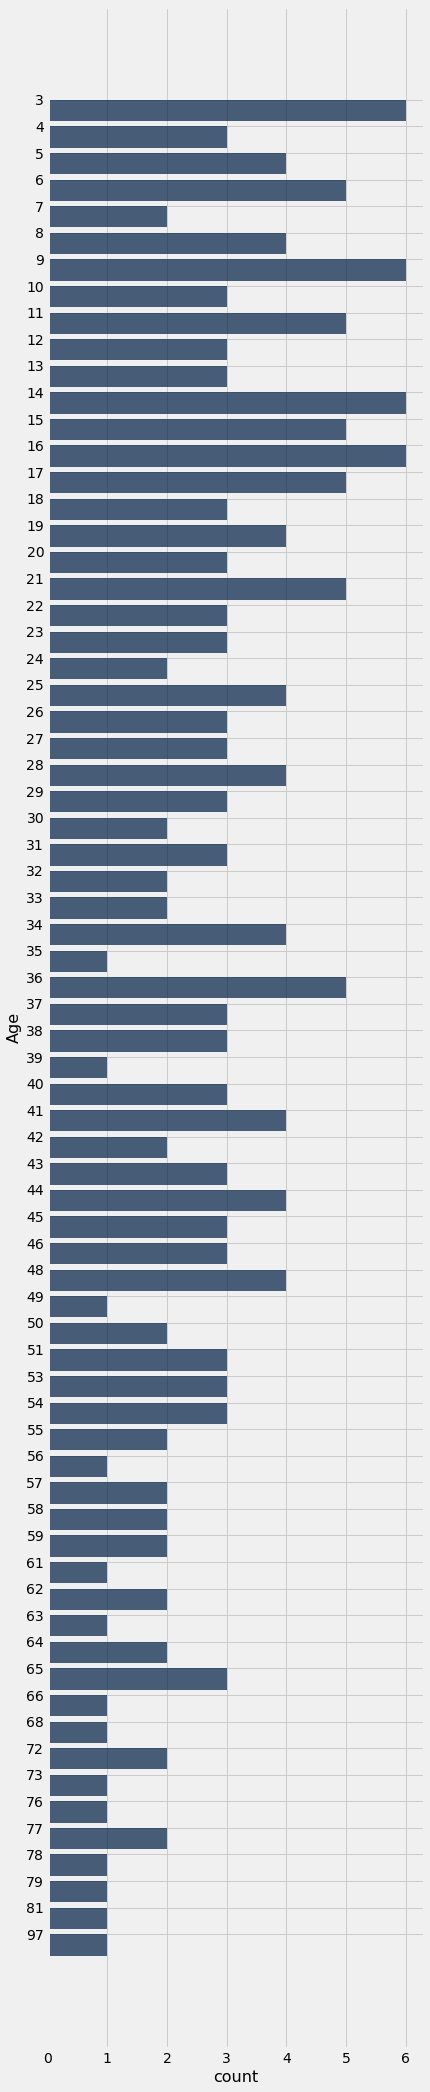

In [6]:
aged.group('Age').barh('Age', 'count')

## Histograms

In [7]:
aged.group('Age')

Age,count
3,6
4,3
5,4
6,5
7,2
8,4
9,6
10,3
11,5
12,3


The `bin` method groups numbers into 10 equally spaced bins

In [8]:
aged.bin('Age').show()

bin,Age count
3,41
12.4,40
21.8,30
31.2,24
40.6,24
50,20
59.4,11
68.8,7
78.2,2
87.6,1


You can ask the `bin` method to use any bins you like

In [9]:
aged.bin('Age', bins=[0, 20, 40, 60, 80, 100])

bin,Age count
0,73
20,59
40,47
60,19
80,2
100,0


How can I make the array `[0, 20, 40, 60, 80, 100]` with less typing?

In [10]:
np.arange(0, 101, 20)

array([  0,  20,  40,  60,  80, 100])

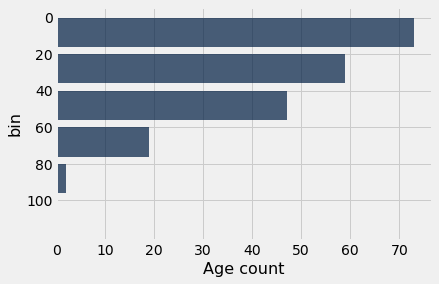

In [11]:
aged.bin('Age', bins=np.arange(0, 101, 20)).barh("bin")

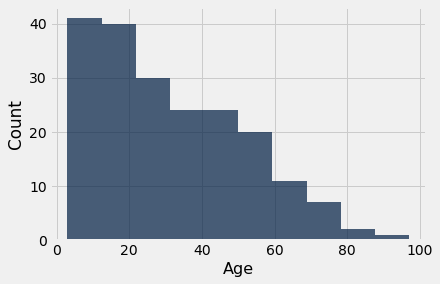

In [12]:
aged.hist('Age', normed=False)

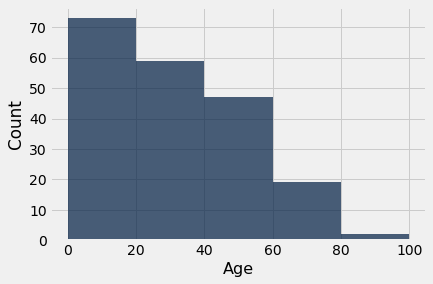

In [13]:
aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

# Uneven bins

There are lots of new movies, and few old movies, so let's change the bin sizes so we can see them better

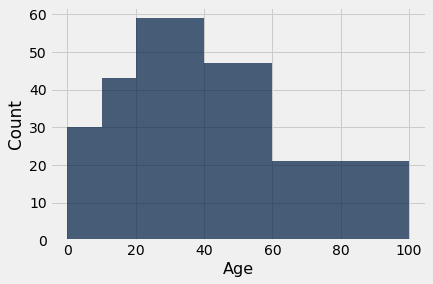

In [14]:
aged.hist('Age', bins=[0, 10, 20, 40, 60, 100], normed=False)

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

## Density

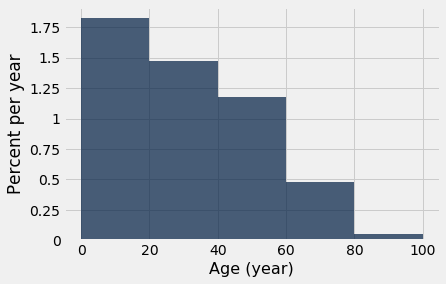

In [15]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year')

In [16]:
1.8*20

36.0

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

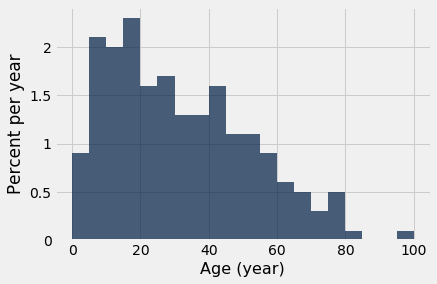

In [17]:
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year')

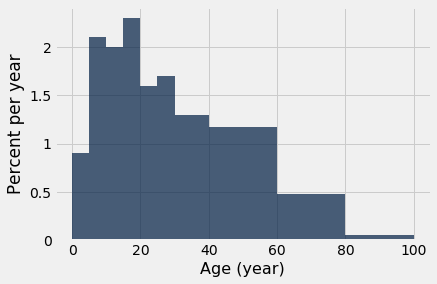

In [18]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], unit='year')

What's going on in this picture?
* a) heights represent counts in each bin
* b) areas represent counts in each bin
* c) both heights and areas represent counts in each bin

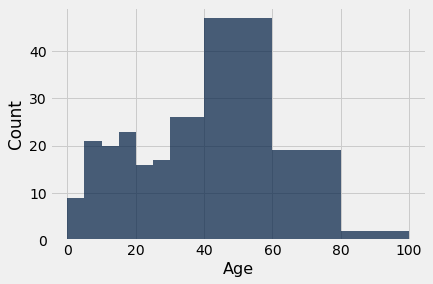

In [19]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], normed=False) 

### Discussion question

In [20]:
actress = Table.read_table('actress.csv')

What's the height of each bar in these 
two histograms?
```
actress.hist(1, bins=[0,15,25,85])
actress.hist(1, bins=[0,15,35,85])
```

In [21]:
9/20 * 100 / 15

3.0

In [22]:
8/20 * 100 / 10

4.0

In [23]:
3/20 * 100 / 60

0.25

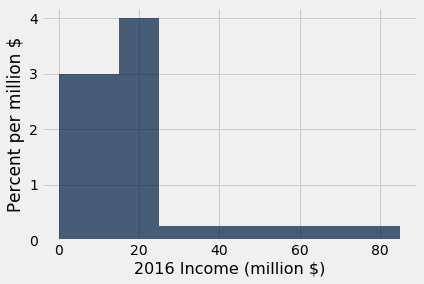

In [24]:
actress.hist(1, bins=[0,15,25,85], unit='million $')

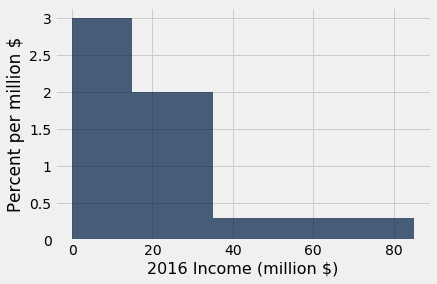

In [25]:
actress.hist(1, bins=[0,15,35,85], unit='million $')

## Overlaid Graphs

In [26]:
heights = Table.read_table('galton.csv')
heights = heights.where('gender', 'female').select('father', 'mother', 'childHeight').relabeled(2, 'daughter')
heights

father,mother,daughter
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,65.5
75.5,66.5,65.5
75,64,68
75,64,67
75,64,64.5
75,64,63
75,58.5,66.5


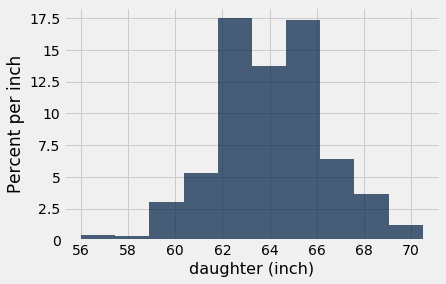

In [27]:
heights.hist('daughter', unit='inch')

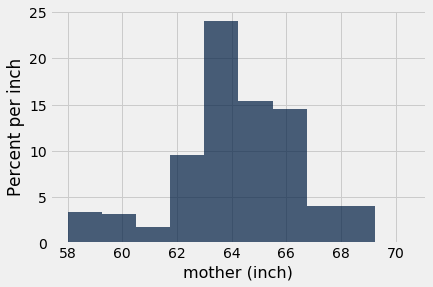

In [28]:
heights.hist('mother', unit='inch')

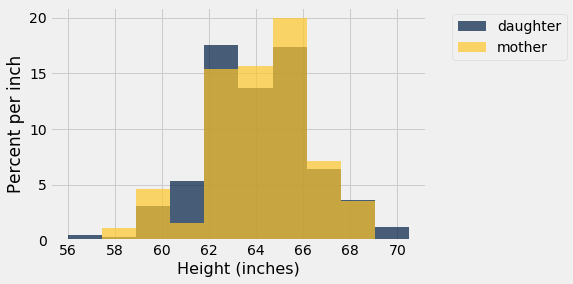

In [29]:
heights.hist('daughter', 'mother', unit='inch')
_ = plots.xlabel('Height (inches)')

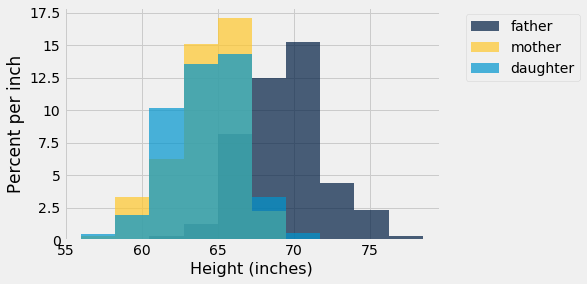

In [30]:
heights.hist(unit='inch')
_ = plots.xlabel('Height (inches)')

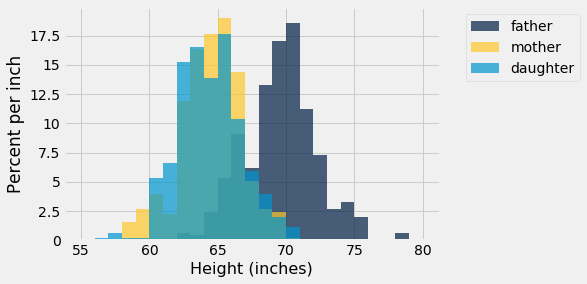

In [31]:
heights.hist(bins=np.arange(55, 81, 1), unit='inch')
_ = plots.xlabel('Height (inches)')

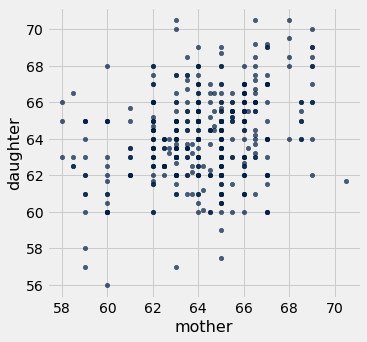

In [32]:
heights.scatter('mother', 'daughter')

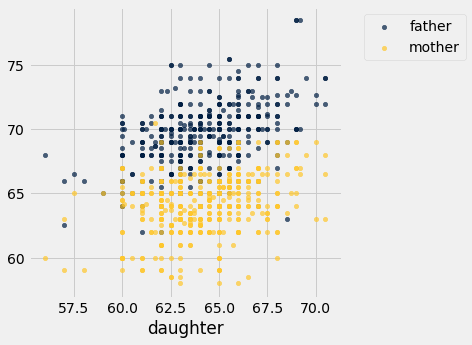

In [33]:
heights.scatter('daughter')